In [127]:
import pandas as pd
from pathlib import Path

In [128]:
data_dir = Path("../collected_data")
csv_files = list(data_dir.glob("*.csv"))

In [129]:
dfs = []
for f in csv_files:
    dfs.append(pd.read_csv(f))

df = pd.concat(dfs, ignore_index=True)
df = df.drop_duplicates(subset=["url"])
df.drop(df.columns[0], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df.sort_values("number", inplace=True)
df.dropna(subset=["authors"], inplace=True)
df

,number,title,authors,info,url
1500,1,ПРОГРАММНОЕ СРЕДСТВО ДЛЯ ВЫЧИСЛЕНИЯ ГРАДИЕНТА ...,"Филиппов Ф.В., Жаранова А.О.",NaN,https://www.elibrary.ru/item.asp?id=65626291
1501,2,МОДЕЛИРОВАНИЕ ПОВЕДЕНИЯ СЛУЧАЙНЫХ ПОКАЗАТЕЛЕЙ ...,Шерстнева А.А.,NaN,https://www.elibrary.ru/item.asp?id=64591373
1502,3,ВЫПОЛНЕНИЕ ЧИСЛЕННЫХ ОПЕРАЦИЙ НАД СЛУЧАЙНЫМИ В...,Шерстнева А.А.,NaN,https://www.elibrary.ru/item.asp?id=64598393
1503,4,СТАТИСТИЧЕСКИЙ АНАЛИЗ ВЕРОЯТНОСТНО-ВРЕМЕННЫХ Х...,Шерстнева А.А.,NaN,https://www.elibrary.ru/item.asp?id=64598568
1504,5,СЕРВИС УПРАВЛЕНИЯ ПРОЕКТАМИ НА ОСНОВЕ ПОДХОДА ...,"Ликарь А.И., Дружина А.В.",NaN,https://www.elibrary.ru/item.asp?id=64591583
...,...,...,...,...,...
7930,14800,УСТРОЙСТВО ДЛЯ АВТОМАТИЧЕСКОГО ОБНАРУЖЕНИЯ НЕИ...,Вольпин А.Г.,"Авторское свидетельство SU 169589 A1, 17.03.19...",https://www.elibrary.ru/item.asp?id=39596647
7931,14801,HOMOPOLYCONDENSATION OF DI-(β-AMINOETHYL)-METH...,"Zavlin P.M., Razumovskii V.V.",Polymer Science U.S.S.R.. \n1965. Т. 7. № 8. ...,https://www.elibrary.ru/item.asp?id=30947234
7932,14802,СПОСОБ ПРОЯВЛЕНИЯ СКРЫТОГО ЭЛЕКТРОФОТОГРАФИЧЕС...,"Закина Х.Х., Нейман С.М., Петров А.А., Суконки...","Авторское свидетельство SU 164020 A1, 30.07.19...",https://www.elibrary.ru/item.asp?id=39591443
7933,14803,АНТЕННАЯ РЕШЕТКА,Яковлев А.Ф.,"Авторское свидетельство SU 166750 A1, 01.12.19...",https://www.elibrary.ru/item.asp?id=39600815


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14469 entries, 1500 to 7934
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   number   14469 non-null  int64 
 1   title    14469 non-null  object
 2   authors  14469 non-null  object
 3   info     7057 non-null   object
 4   url      14469 non-null  object
dtypes: int64(1), object(4)
memory usage: 678.2+ KB


In [131]:
df.to_csv("result.csv")

In [132]:
unique_authors = set()

for authors in df["authors"]:
    for author in authors.split(","):
        unique_authors.add(author.strip())

print(len(unique_authors))

9302


In [133]:
author_counts = {}

for authors in df["authors"]:
    for author in authors.split(","):
        author_name = author.strip()
        if author_counts.get(author_name):
            author_counts[author_name] += 1
        else:
            author_counts[author_name] = 1
            
items = [(key, value) for key, value in author_counts.items()]
items.sort(key=lambda i: i[1], reverse=True)
print(len(items))
items[:10]


9302


[('Киричек Р.В.', 313),
 ('Кучерявый А.Е.', 212),
 ('Макаров В.В.', 194),
 ('Фокин Г.А.', 170),
 ('Красов А.В.', 168),
 ('Птицына Л.К.', 166),
 ('Парамонов А.И.', 164),
 ('Верхова Г.В.', 136),
 ('Гехт А.Б.', 126),
 ('Седышев Э.Ю.', 125)]

In [134]:
import matplotlib.pyplot as plt

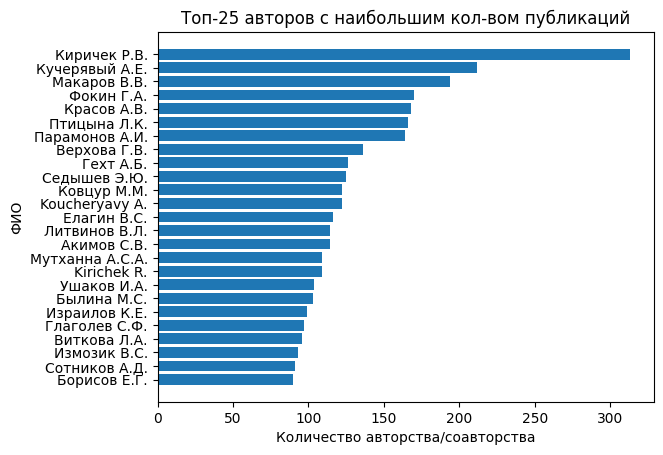

In [135]:
xs, ys = zip(*items[:25][::-1])

plt.barh(xs, ys)

plt.xlabel('Количество авторства/соавторства')
plt.ylabel('ФИО')
plt.title('Топ-25 авторов с наибольшим кол-вом публикаций')

plt.show()